# Clustering and Dimension Reduction - Financial Statements
A project by Dustin Pacholleck

## Introduction
In the financial market it is vital to observe how companies are performing. A special focus is usually on the financial statements [1]. Every publicly traded company has to issue every quarter such a statement. We can leverage this and apply clustering to get a quick understanding of the health of a company and find similar once for further investment decisions [2]. </br> 
Not only for investors it becomes relevant to group companies into clusters. Also bank can leverage this method to preliminary investigate the health of a company based on their financial statements. Another application could be spotting outlier companies which might have accounting irregulatities [3]  

This projects tries to apply clustering on the S&P 500 companies based on their quarterly report in quarter 3 2021 and tries to find clusters describing the performance of such companies. Furthermore, we will use dimenion reduction to tackle the problem of correlating financial figures and to make them more digestable for the reader. 

The data was mined in a project by Pierre-Louis Danieau and can be found on https://www.kaggle.com/pierrelouisdanieau/financial-data-sp500-companies. 

### About Clustering
Clustering is a method to extract information from unlablled data by grouping objects of similarity together wheras objects with dissimilarity in other clusters [4].
In gerneral clustering methods might be divided into hierarchical and partitioning methods [5].</br>
Examples for such methods are:</br>
**Hierachical Methods**
1. Agglomerative Hierachical Clustering
2. Divisive hierarchical clustering
**Partitioning Methods**
1. K-Means
2. Partitioning Around Medoids (PAM)
3. Clustering Large Applications (CLARA)

In this project we focus will compare different approaches of clustering and evaluate which performs best with which number of clusters. 
The evaluation of clustering can be done by many criterias. We will focus on connectivity, silhouette width and Dunn Index. 
"The connectivity indicates the degree of connectedness of the clusters, as determined by the k-nearest neighbors. [...] The connectivity has a value between 0 and infinity and should be minimized. Both the Silhouette Width and the Dunn Index combine measures of compactness and separation of the clusters. The Silhouette Width is the average of each observation's Silhouette value. The Silhouette value measures the degree of confidence in a particular clustering assignment and lies in the interval [-1,1], with well-clustered observations having values near 1 and poorly clustered observations having values near -1. [...] The Dunn Index is the ratio between the smallest distance between observations not in the same cluster to the largest intra-cluster distance. It has a value between 0 and infinity and should be maximized" [6].

### About Dimension Reduction
In dimensionality reduction the ideas is that different variables are largely redundant and the "real" underlying variability should be extracted. This can be useful for computational purposes, a better generalization and a better understanding of the data [7]. The most popular methods for dimension reduction are Principal Component Analysis (PCA) and Multidimensional Scaling (MDS). 


## Set-Up and Data Preperation

Here we load the dataframe, inspect it and prepare it for further analyis.

In [1]:
install.packages("psych")
install.packages("data.table")


  There is a binary version available but the source version is later:
      binary source needs_compilation
psych  2.1.3  2.1.9             FALSE



installing the source package 'psych'




  There is a binary version available but the source version is later:
           binary source needs_compilation
data.table 1.14.0 1.14.2              TRUE

  Binaries will be installed
package 'data.table' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'data.table'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\duzzi\anaconda3\Lib\R\library\00LOCK\data.table\libs\x64\datatable.dll nach C:\Users\duzzi\anaconda3\Lib\R\library\data.table\libs\x64\datatable.dll zu kopieren: Permission denied"Warning message:
"restored 'data.table'"


The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpSSreOT\downloaded_packages


In [2]:
library(psych)
library(data.table)

Warning message:
"package 'data.table' was built under R version 3.6.3"

In [3]:
#load the dataframe
df <- read.csv("C:/Users/duzzi/Documents/University_Projects/Unsupervised-Learning/data/financial data sp500 companies.csv")

In [4]:
#check if import successful
head(df)

X,date,firm,Ticker,Research.Development,Income.Before.Tax,Net.Income,Selling.General.Administrative,Gross.Profit,Ebit,Operating.Income,Interest.Expense,Income.Tax.Expense,Total.Revenue,Total.Operating.Expenses,Cost.Of.Revenue,Total.Other.Income.Expense.Net,Net.Income.From.Continuing.Ops,Net.Income.Applicable.To.Common.Shares
0,2021-09-30,3M,MMM,4.82e+08,1.761e+09,1.434e+09,1.739e+09,4.089e+09,1.868e+09,1.868e+09,-1.17e+08,3.24e+08,8.942e+09,7.074e+09,4.853e+09,-1.07e+08,1.437e+09,1.434e+09
1,2021-06-30,3M,MMM,5.14e+08,1.940e+09,1.524e+09,1.666e+09,4.231e+09,2.051e+09,2.051e+09,-1.21e+08,4.15e+08,8.950e+09,6.899e+09,4.719e+09,-1.11e+08,1.525e+09,1.524e+09
2,2021-03-31,3M,MMM,5.20e+08,1.946e+09,1.624e+09,1.720e+09,4.327e+09,2.087e+09,2.087e+09,-1.32e+08,3.19e+08,8.851e+09,6.764e+09,4.524e+09,-1.41e+08,1.627e+09,1.624e+09
3,2020-12-31,3M,MMM,4.49e+08,1.706e+09,1.389e+09,1.814e+09,4.246e+09,1.983e+09,1.983e+09,-1.41e+08,3.16e+08,8.583e+09,6.600e+09,4.337e+09,-2.77e+08,1.390e+09,1.389e+09
4,2021-09-30,3M,MMM,4.82e+08,1.761e+09,1.434e+09,1.739e+09,4.089e+09,1.868e+09,1.868e+09,-1.17e+08,3.24e+08,8.942e+09,7.074e+09,4.853e+09,-1.07e+08,1.437e+09,1.434e+09
5,2021-06-30,3M,MMM,5.14e+08,1.940e+09,1.524e+09,1.666e+09,4.231e+09,2.051e+09,2.051e+09,-1.21e+08,4.15e+08,8.950e+09,6.899e+09,4.719e+09,-1.11e+08,1.525e+09,1.524e+09


In [5]:
#Inspect dataframe
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X,1,2012,1.005500e+03,5.809587e+02,1005.5,1.005500e+03,7.457478e+02,0.0000e+00,2.01100e+03,2011,0.000000e+00,-1.201789,1.295183e+01
date*,2,2012,7.268091e+01,3.483693e+01,81.0,7.221242e+01,4.447800e+01,1.0000e+00,1.41000e+02,140,8.364356e-02,-1.007849,7.766510e-01
firm*,3,2012,2.510020e+02,1.452360e+02,251.0,2.510000e+02,1.868076e+02,1.0000e+00,5.02000e+02,501,8.111970e-05,-1.201909,3.237876e+00
Ticker*,4,2012,2.516103e+02,1.448276e+02,252.0,2.516379e+02,1.853250e+02,1.0000e+00,5.02000e+02,501,-2.172555e-03,-1.199221,3.228772e+00
Research.Development,5,634,6.344579e+08,1.502277e+09,166000000.0,2.759287e+08,1.958744e+08,-1.0300e+07,1.64660e+10,16476300000,5.023922e+00,32.925824,5.966306e+07
Income.Before.Tax,6,2011,8.740406e+08,2.486569e+09,345900000.0,5.136325e+08,3.811765e+08,-2.6613e+10,3.35790e+10,60192000000,4.545634e+00,53.640806,5.544911e+07
Net.Income,7,2012,7.166330e+08,2.109107e+09,283000000.0,4.162791e+08,3.068011e+08,-2.0070e+10,2.87550e+10,48825000000,4.766506e+00,52.335555,4.702021e+07
Selling.General.Administrative,8,1952,1.103981e+09,2.519176e+09,381466000.0,5.619678e+08,4.379111e+08,-3.6130e+09,3.03310e+10,33944000000,6.252102e+00,53.376249,5.701888e+07
Gross.Profit,9,2012,2.567361e+09,5.045961e+09,1055623000.0,1.429321e+09,9.330106e+08,-4.0620e+09,4.89040e+10,52966000000,4.722847e+00,26.982338,1.124941e+08
Ebit,10,2012,8.725539e+08,2.109224e+09,356059500.0,5.105455e+08,3.825708e+08,-6.3890e+09,3.35340e+10,39923000000,6.883945e+00,69.348730,4.702283e+07


In [6]:
# Check Structure
str(df)

'data.frame':	2012 obs. of  19 variables:
 $ X                                     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ date                                  : Factor w/ 141 levels "2020-03-31","2020-03-31 00:00:00",..: 137 113 82 55 137 113 82 55 137 113 ...
 $ firm                                  : Factor w/ 502 levels "3M","A. O. Smith",..: 1 1 1 1 1 1 1 1 2 2 ...
 $ Ticker                                : Factor w/ 502 levels "A","AAL","AAP",..: 307 307 307 307 307 307 307 307 40 40 ...
 $ Research.Development                  : num  4.82e+08 5.14e+08 5.20e+08 4.49e+08 4.82e+08 5.14e+08 5.20e+08 4.49e+08 NA NA ...
 $ Income.Before.Tax                     : num  1.76e+09 1.94e+09 1.95e+09 1.71e+09 1.76e+09 ...
 $ Net.Income                            : num  1.43e+09 1.52e+09 1.62e+09 1.39e+09 1.43e+09 ...
 $ Selling.General.Administrative        : num  1.74e+09 1.67e+09 1.72e+09 1.81e+09 1.74e+09 ...
 $ Gross.Profit                          : num  4.09e+09 4.23e+09 4.33e+09 4.25e+09 4

The dataframe consists of 2012 observations and 19 variables. Besides the describing X, date, firm and ticker, we have variables about the key figures of a financial statement. 

From the first inspection of the dataframe we see that we have data from 2020-03-31 to 2021-09-30 for each quarter. Furthermore, we can see that the variable date is imported as a factor and not as a date. We also see that the dataframe has an indexcolumn X which needs to be removed. From the number of values we can already see that we have some variables with high numbers of missing values. This needs to be investigated further.

Because we are only interested in the most recent data, we also have to omit the previous years.

In [7]:
df$date <- as.Date(df$date)
df$Ticker <- as.character(df$Ticker)
df$firm <- as.character(df$firm)

In [8]:
dt <- as.data.table(df, TRUE)

In [9]:
# Only most recent date
dt_adjust <- dt[date== "2021-09-30"]

In [10]:
# remove rn and x 
dt_adjust <- dt_adjust[, !c("rn","X")]

In [11]:
#remove duplicates
dt_adjust <- dt_adjust[!duplicated(dt_adjust)]

### Reinspect dataframe after first cleaning

In [12]:
describe(dt_adjust)

Warning message in FUN(newX[, i], ...):
"kein nicht-fehlendes Argument für min; gebe Inf zurück"Warning message in FUN(newX[, i], ...):
"kein nicht-fehlendes Argument für max; gebe -Inf zurück"

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
date,1,90,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
firm*,2,90,45.5,2.612470e+01,45.5,45.5,3.335850e+01,1,9.0000e+01,89,0.000000,-1.240068,2.753785e+00
Ticker*,3,90,45.5,2.612470e+01,45.5,45.5,3.335850e+01,1,9.0000e+01,89,0.000000,-1.240068,2.753785e+00
Research.Development,4,24,268885583.3,3.821233e+08,80651000.0,200403250.0,7.828276e+07,13289000,1.6550e+09,1641711000,2.084356,4.519439,7.800060e+07
Income.Before.Tax,5,90,782506400.0,1.361899e+09,444500000.0,574561750.0,4.216514e+08,-2246000000,8.9500e+09,11196000000,3.042392,14.176457,1.435567e+08
Net.Income,6,90,641338166.7,1.122860e+09,347150000.0,466862444.4,3.458861e+08,-1564000000,7.6910e+09,9255000000,3.329097,16.662442,1.183598e+08
Selling.General.Administrative,7,85,944478764.7,1.850726e+09,318800000.0,535253333.3,3.659057e+08,-142000000,1.2675e+10,12817000000,3.992266,19.131312,2.007394e+08
Gross.Profit,8,90,2092222877.8,3.291859e+09,970435500.0,1352529361.1,8.496254e+08,-349683000,2.3390e+10,23739683000,3.878007,18.984572,3.469924e+08
Ebit,9,90,686783433.3,9.521512e+08,415800000.0,498285708.3,3.699087e+08,-1006062000,4.9610e+09,5967062000,2.522526,7.520405,1.003655e+08
Operating.Income,10,90,902904544.4,1.384216e+09,471411500.0,605878458.3,3.704802e+08,-1006062000,8.9500e+09,9956062000,3.329471,13.490809,1.459091e+08


After the first cleaning we see that we have data for 90 companies from the S&P 500. 
The variable Research.Development has a lot of missing values. Therefore, we will drop it. 
For the rest, we only see at Interest.Expense and Selling.General.Administrative some missing values. Here we decided to remove those companies from our dataframe.

In [13]:
# Drop Research.Development due to high number of missing values
dt_adjust_clean <- dt_adjust[,!4]
dt_adjust_clean <- na.omit(dt_adjust_clean)

In [14]:
describe(dt_adjust_clean)

Warning message in FUN(newX[, i], ...):
"kein nicht-fehlendes Argument für min; gebe Inf zurück"Warning message in FUN(newX[, i], ...):
"kein nicht-fehlendes Argument für max; gebe -Inf zurück"

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
date,1,71,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
firm*,2,71,36,2.063977e+01,36,36,2.668680e+01,1,7.1000e+01,70,0.0000000,-1.250810,2.449490e+00
Ticker*,3,71,36,2.063977e+01,36,36,2.668680e+01,1,7.1000e+01,70,0.0000000,-1.250810,2.449490e+00
Income.Before.Tax,4,71,639572352,1.031313e+09,441000000,530954737,4.136454e+08,-2246000000,5.0350e+09,7281000000,1.4095732,4.943683,1.223944e+08
Net.Income,5,71,521233789,8.305731e+08,343000000,428042754,3.488558e+08,-1564000000,4.1120e+09,5676000000,1.5239019,5.253728,9.857089e+07
Selling.General.Administrative,6,71,641071042,1.132335e+09,274846000,378225070,2.895414e+08,-142000000,6.8440e+09,6986000000,3.4170086,13.452928,1.343834e+08
Gross.Profit,7,71,1713552282,2.174123e+09,965871000,1196044263,7.743901e+08,-349683000,9.9980e+09,10347683000,2.4426342,5.713219,2.580209e+08
Ebit,8,71,783359211,1.018728e+09,472000000,575800491,3.446037e+08,-1006062000,4.9610e+09,5967062000,2.3521850,6.177499,1.209008e+08
Operating.Income,9,71,783359211,1.018728e+09,472000000,575800491,3.446037e+08,-1006062000,4.9610e+09,5967062000,2.3521850,6.177499,1.209008e+08
Interest.Expense,10,71,-116074606,1.729789e+08,-58200000,-77207842,7.531608e+07,-1016000000,1.5800e+05,1016158000,-2.9210924,10.133401,2.052882e+07


After data preparation we are left with 71 companies with data for all the variables which can be used for our further work.

In [15]:
#drop date, firm, ticker
dt_adjust <- dt_adjust_clean[,!1:3]

### Analyse of Variables

To get an understanding of our data we need to analyse the variables.

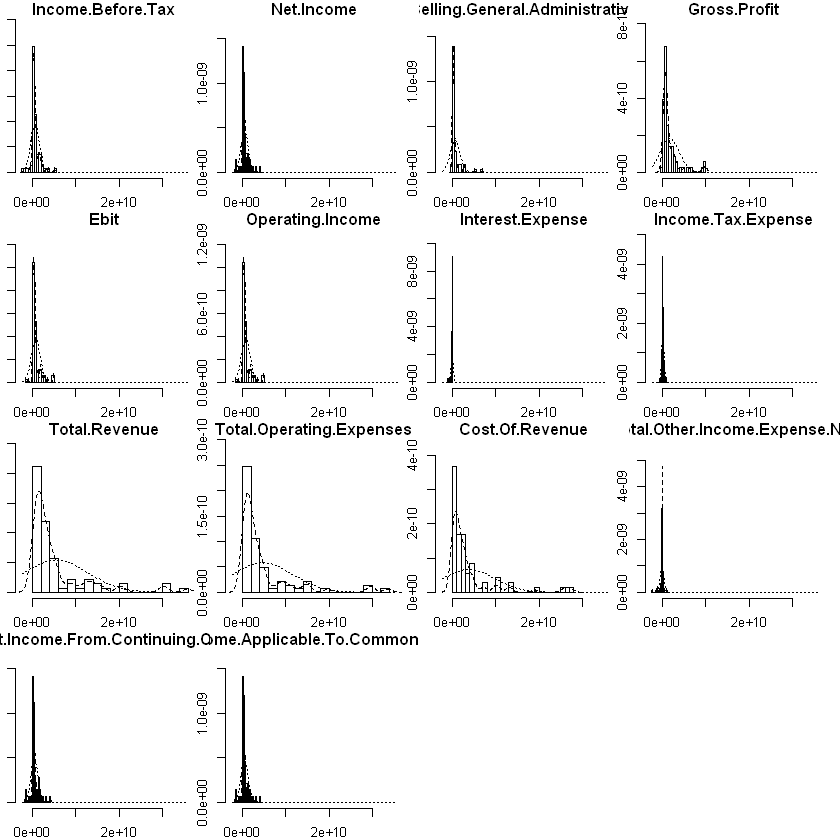

In [17]:
multi.hist(dt_adjust)

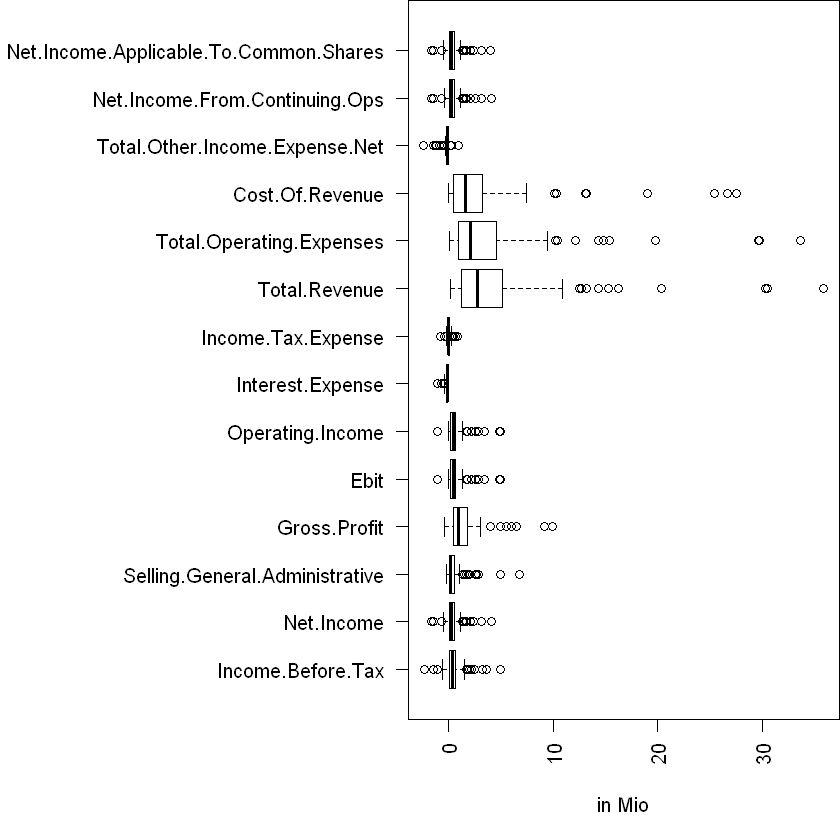

In [18]:
par(mar = c(5, 17, 0,0))
boxplot(dt_adjust/1000000000,horizontal=TRUE,las=2,xlab="in Mio" )


We can see, that most values show some sort of outliers. This we have to keep in mind in further analysis.

## Analyse relationship of variables

Not only we need to understand the distribution of all variables but also their relationships.

In [19]:
install.packages("PerformanceAnalytics")
library("PerformanceAnalytics")

package 'PerformanceAnalytics' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'PerformanceAnalytics'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\duzzi\anaconda3\Lib\R\library\00LOCK\PerformanceAnalytics\libs\x64\PerformanceAnalytics.dll nach C:\Users\duzzi\anaconda3\Lib\R\library\PerformanceAnalytics\libs\x64\PerformanceAnalytics.dll zu kopieren: Permission denied"Warning message:
"restored 'PerformanceAnalytics'"


The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpSSreOT\downloaded_packages


Warning message:
"package 'PerformanceAnalytics' was built under R version 3.6.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'xts'

The following objects are masked from 'package:data.table':

    first, last


Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend



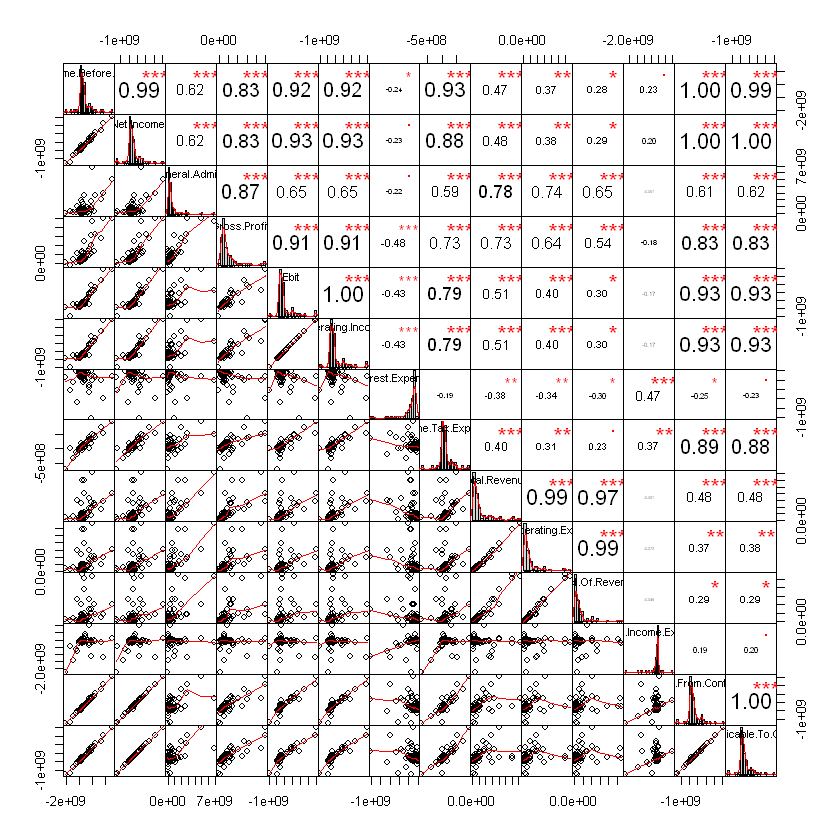

In [20]:
chart.Correlation(dt_adjust, histogram=TRUE, pch=19)

From the graph above we see that we deal with some highly correlated variables. This makes sense, since some values are based on the same calculation.
Therefore, we should either drop variables or use dimension reduction [8]. We choose to use dimentsion reduction to not loose valuable relationships hidden in the variables.

## Dimension Reduction

As mentioned in the introduction, dimension reduction allows us to capture the variability of the data in fewer dimensions. 
Here, for example either MDS or PCA can be helpful. PCA is the most established method [7] and therefore we will apply it in our project. 
We apply it here to better understand our data but also to deal with the correlated variables for our further clustering.

In [28]:
# install the packages
install.packages("factoextra")
install.packages("flexclust")
install.packages("fpc")
install.packages("clustertend")
install.packages("cluster")
install.packages("ClusterR")
install.packages("tidyverse")
install.packages("dendextend")
library(factoextra)
library(flexclust)
library(fpc)
library(clustertend)
library(cluster)
library(ClusterR)
library(tidyverse)
library(dendextend)

package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpSSreOT\downloaded_packages
package 'flexclust' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'flexclust'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\duzzi\anaconda3\Lib\R\library\00LOCK\flexclust\libs\x64\flexclust.dll nach C:\Users\duzzi\anaconda3\Lib\R\library\flexclust\libs\x64\flexclust.dll zu kopieren: Permission denied"Warning message:
"restored 'flexclust'"


The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpSSreOT\downloaded_packages
package 'fpc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpSSreOT\downloaded_packages

  There is a binary version available but the source version is later:
            binary source needs_compilation
clustertend    1.5    1.6             FALSE



installing the source package 'clustertend'



package 'cluster' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cluster'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\duzzi\anaconda3\Lib\R\library\00LOCK\cluster\libs\x64\cluster.dll nach C:\Users\duzzi\anaconda3\Lib\R\library\cluster\libs\x64\cluster.dll zu kopieren: Permission denied"Warning message:
"restored 'cluster'"


The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpSSreOT\downloaded_packages

  There is a binary version available but the source version is later:
         binary source needs_compilation
ClusterR  1.2.4  1.2.6              TRUE

  Binaries will be installed
package 'ClusterR' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'ClusterR'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\duzzi\anaconda3\Lib\R\library\00LOCK\ClusterR\libs\x64\ClusterR.dll nach C:\Users\duzzi\anaconda3\Lib\R\library\ClusterR\libs\x64\ClusterR.dll zu kopieren: Permission denied"Warning message:
"restored 'ClusterR'"


The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpSSreOT\downloaded_packages


also installing the dependencies 'xfun', 'tinytex', 'knitr', 'rmarkdown', 'jsonlite', 'reprex'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
xfun        0.22   0.29              TRUE
tinytex     0.31   0.37             FALSE
knitr       1.33   1.37             FALSE
rmarkdown    2.8   2.11             FALSE
jsonlite   1.7.2  1.7.3              TRUE
reprex     2.0.0  2.0.1             FALSE

  Binaries will be installed
package 'xfun' successfully unpacked and MD5 sums checked
package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\duzzi\anaconda3\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll nach C:\Users\duzzi\anaconda3\Lib\R\library\jsonlite\libs\x64\jsonlite.dll zu kopieren: Permission denied"Warning message:
"restored 'jsonlite'"

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpSSreOT\downloaded_packages


installing the source packages 'tinytex', 'knitr', 'rmarkdown', 'reprex'

Warning message in install.packages("tidyverse"):
"installation of package 'tinytex' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'knitr' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'rmarkdown' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'reprex' had non-zero exit status"


  There is a binary version available but the source version is later:
           binary source needs_compilation
dendextend 1.15.1 1.15.2             FALSE



installing the source package 'dendextend'

Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2

Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'flexclust' was built under R version 3.6.3"Loading required package: grid
Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: modeltools
Warning message:
"package 'modeltools' was built under R version 3.6.3"Loading required package: stats4
Warning message:
"package 'fpc' was built under R version 3.6.3"Package `clustertend` is deprecated.  Use package `hopkins` instead.
Warning message:
"package 'cluster' was built under R version 3.6.3"Warning message:
"package 'ClusterR' was built under R version 3.6.3"Loading required package: gtools
Warning messag

ERROR: Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'jsonlite' 1.6 is already loaded, but >= 1.7.2 is required


As a first step we will standardize our data.

In [29]:
# Standardise data
df_adj_z <- as.data.frame(lapply(dt_adjust, scale))
# Add rownames
rownames(df_adj_z) <- dt_adjust_clean$firm

And then apply the PCA by calculating the covariance matrix and computing the eigenvectors.

In [32]:
pca <- prcomp(df_adj_z, center=FALSE, scale=FALSE)

#### Inspect the Principal Components

In [33]:
pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Income.Before.Tax,-0.313723602,0.2120264,-0.04057889,0.063090009,-0.07975123,-0.007465774,-0.06979151,-0.302109736,0.0080370334,4.032476e-01,9.016463e-03,-7.080666e-01,-2.903532e-01,4.518277e-03
Net.Income,-0.314109913,0.2007916,-0.02863539,0.007272681,-0.17670294,0.229932105,-0.05163781,0.543749976,0.6911740995,-7.090512e-11,9.133319e-16,-5.551115e-16,-2.317591e-15,4.965646e-17
Selling.General.Administrative,-0.267801186,-0.2010564,-0.11765092,-0.436620115,0.64430283,0.245691370,-0.45579427,-0.009438939,-0.0072168279,2.561149e-12,-2.513181e-16,-5.551115e-17,-2.081668e-17,9.410875e-17
Gross.Profit,-0.319079826,-0.0848021,0.12416207,-0.169813517,0.26869891,0.157769002,0.82140559,-0.056096604,0.0082666297,-8.556509e-03,-8.232005e-02,9.567831e-02,-2.356679e-01,1.370639e-02
Ebit,-0.314051155,0.1031201,0.22636163,-0.099864539,-0.15451989,-0.119551466,-0.10208179,-0.222383894,0.0053395729,-4.773020e-01,-5.161320e-02,-9.577491e-03,1.074133e-02,-7.076472e-01
Operating.Income,-0.314051155,0.1031201,0.22636163,-0.099864539,-0.15451989,-0.119551466,-0.10208179,-0.222383894,0.0053395729,-4.773020e-01,-2.365073e-02,-2.698818e-02,7.604561e-02,7.046737e-01
Interest.Expense,0.132690500,0.2158609,-0.50412290,-0.732101806,-0.29539099,-0.201171243,0.13263384,-0.019139518,0.0007816539,5.333296e-12,7.212655e-17,1.075529e-16,6.331741e-17,9.456953e-17
Income.Tax.Expense,-0.283220782,0.2305427,-0.14122288,0.179830068,0.36289920,-0.779524156,0.01772395,0.193016193,-0.0018513880,1.155841e-01,-1.827620e-03,1.435238e-01,5.885407e-02,-9.158468e-04
Total.Revenue,-0.242077984,-0.4060354,-0.17356118,0.045665816,-0.13891416,-0.059140785,0.09439262,-0.013163405,0.0018387935,-2.158276e-02,8.237208e-01,-5.981502e-02,1.710582e-01,-2.495575e-02
Total.Operating.Expenses,-0.212132004,-0.4487501,-0.21871687,0.063494268,-0.12552149,-0.045505355,0.11584824,0.018759512,0.0011754311,4.738505e-02,-5.100652e-01,-2.478061e-01,5.881568e-01,-2.015190e-02


#### Number of Dimensions to Use

Theory suggest different methods to assess what is the best amount of dimensions for further analyses [9]:
- Eigenvalues
    - It is said that the cut of should be done where Eigenvalues are below 1.
- Percentage of Explained Variance
    - Here the cut of is suggested where additional gains of explained variance from adding another dimension becomes marginal.
   

In [34]:
df_adj_z.cov<-cov(df_adj_z)
df_adj_z.eigen<-eigen(df_adj_z.cov)
df_adj_z.eigen$values

[1]  8.914491e+00  2.570840e+00  1.545690e+00  5.617329e-01  2.863675e-01
 [6]  1.011038e-01  1.582755e-02  3.896652e-03  5.020768e-05  1.587762e-16
[11]  8.748695e-17  6.849918e-17 -2.719527e-17 -2.179978e-16

The Eigenvalues suggest a use of three dimensions.

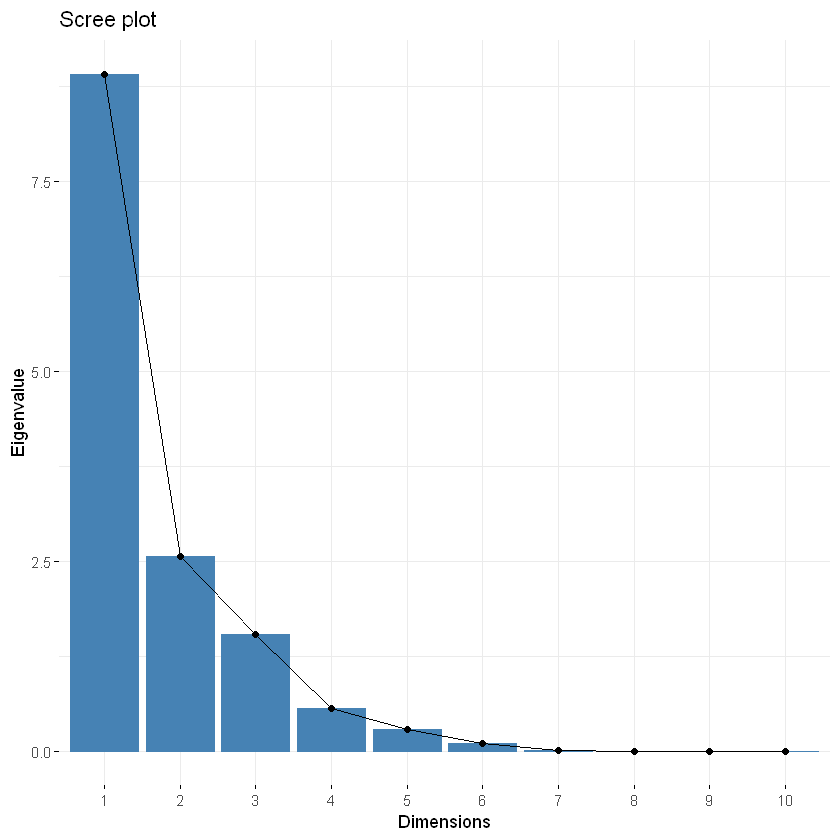

In [35]:
fviz_eig(pca, choice='eigenvalue')

In [36]:
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.9857 1.6034 1.2433 0.74949 0.53513 0.31797 0.12581
Proportion of Variance 0.6368 0.1836 0.1104 0.04012 0.02045 0.00722 0.00113
Cumulative Proportion  0.6368 0.8204 0.9308 0.97091 0.99137 0.99859 0.99972
                           PC8      PC9      PC10      PC11      PC12      PC13
Standard deviation     0.06242 0.007086 1.116e-10 2.556e-16 1.409e-16 9.795e-17
Proportion of Variance 0.00028 0.000000 0.000e+00 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  1.00000 1.000000 1.000e+00 1.000e+00 1.000e+00 1.000e+00
                            PC14
Standard deviation     1.044e-17
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

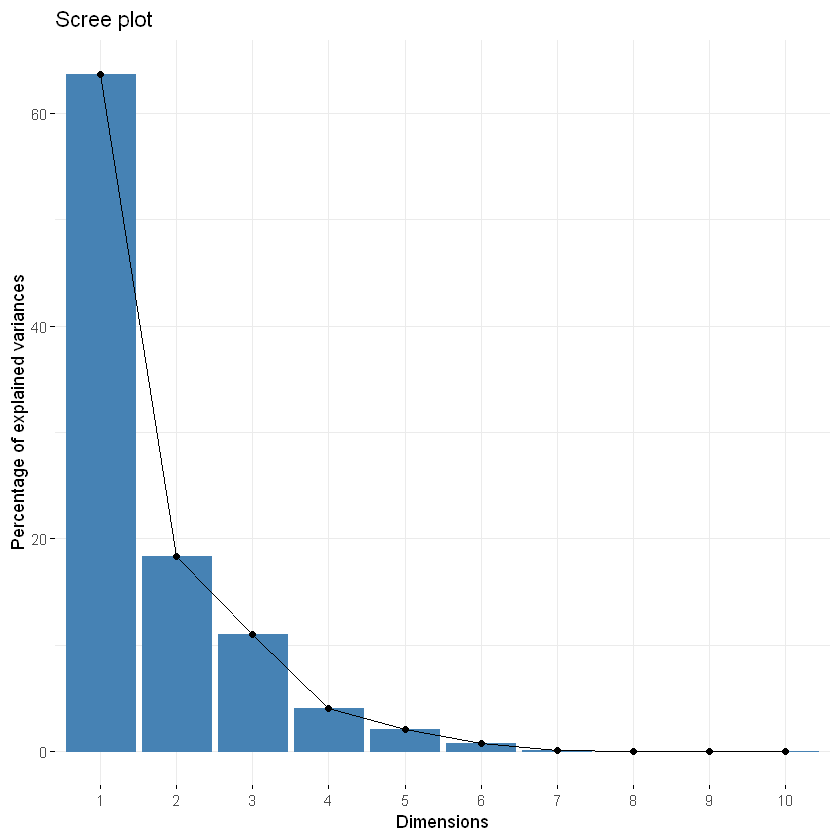

In [37]:
fviz_eig(pca)

Even though the Eigenvalues suggested a cut off at 3 dimensions, the variance explained suggest even up to five dimensions bring relativly good improvments (PC4->PC5: +2,046%). 
Nevetheless, synthesizing the result from the Eigenvalues and the Explained Variance, we decide to keep **four dimensions**. 

#### Describing the Dimensions

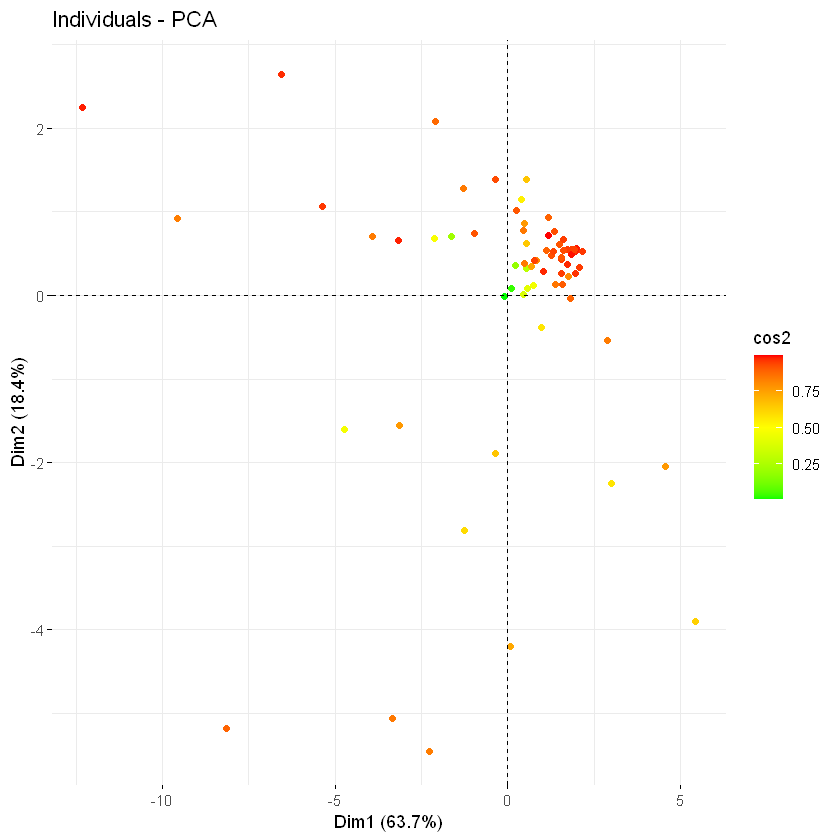

In [38]:
fviz_pca_ind(pca, col.ind="cos2", geom = "point", gradient.cols = c("green", "yellow", "red" ))

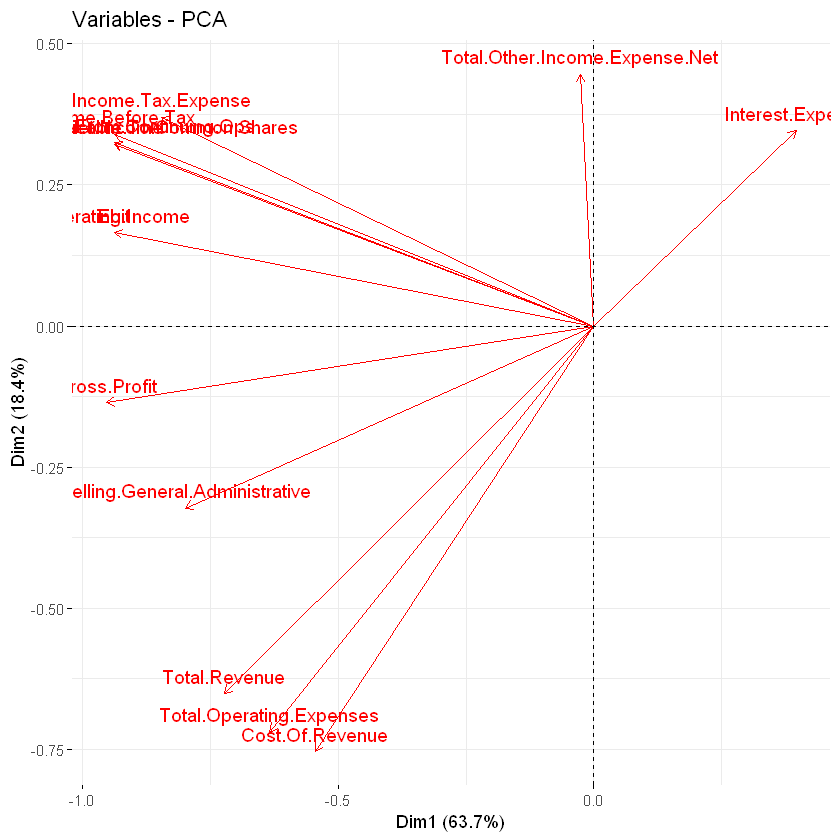

In [39]:
fviz_pca_var(pca, col.var = "red")

From the charts above we can see for the first two dimensions the effect on the variables. The can see that for example total revenue has a negative effect.

In [40]:
install.packages("ggplot2", repo="http://cran.r-project.org",dep=TRUE)
install.packages("gridExtra", repo="http://cran.r-project.org",dep=TRUE)
library(ggplot2)
library(gridExtra)

also installing the dependencies 'xfun', 'tinytex', 'testthat', 'knitr', 'rmarkdown', 'vdiffr'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
xfun        0.22   0.29              TRUE
tinytex     0.31   0.37             FALSE
testthat   3.0.2  3.1.2              TRUE
knitr       1.33   1.37             FALSE
rmarkdown    2.8   2.11             FALSE
vdiffr     0.3.3  1.0.2              TRUE
ggplot2    3.3.3  3.3.5             FALSE

  Binaries will be installed
package 'xfun' successfully unpacked and MD5 sums checked
package 'testthat' successfully unpacked and MD5 sums checked
package 'vdiffr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpSSreOT\downloaded_packages


installing the source packages 'tinytex', 'knitr', 'rmarkdown', 'ggplot2'

Warning message in install.packages("ggplot2", repo = "http://cran.r-project.org", :
"installation of package 'tinytex' had non-zero exit status"Warning message in install.packages("ggplot2", repo = "http://cran.r-project.org", :
"installation of package 'knitr' had non-zero exit status"Warning message in install.packages("ggplot2", repo = "http://cran.r-project.org", :
"installation of package 'rmarkdown' had non-zero exit status"also installing the dependencies 'xfun', 'knitr'




  There are binary versions available but the source versions are later:
      binary source needs_compilation
xfun    0.22   0.29              TRUE
knitr   1.33   1.37             FALSE

  Binaries will be installed
package 'xfun' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpSSreOT\downloaded_packages


installing the source package 'knitr'

Warning message in install.packages("gridExtra", repo = "http://cran.r-project.org", :
"installation of package 'knitr' had non-zero exit status"Warning message:
"package 'gridExtra' was built under R version 3.6.3"

To describe the four dimensions we will analyse the contribution of the variables to the dimension. 

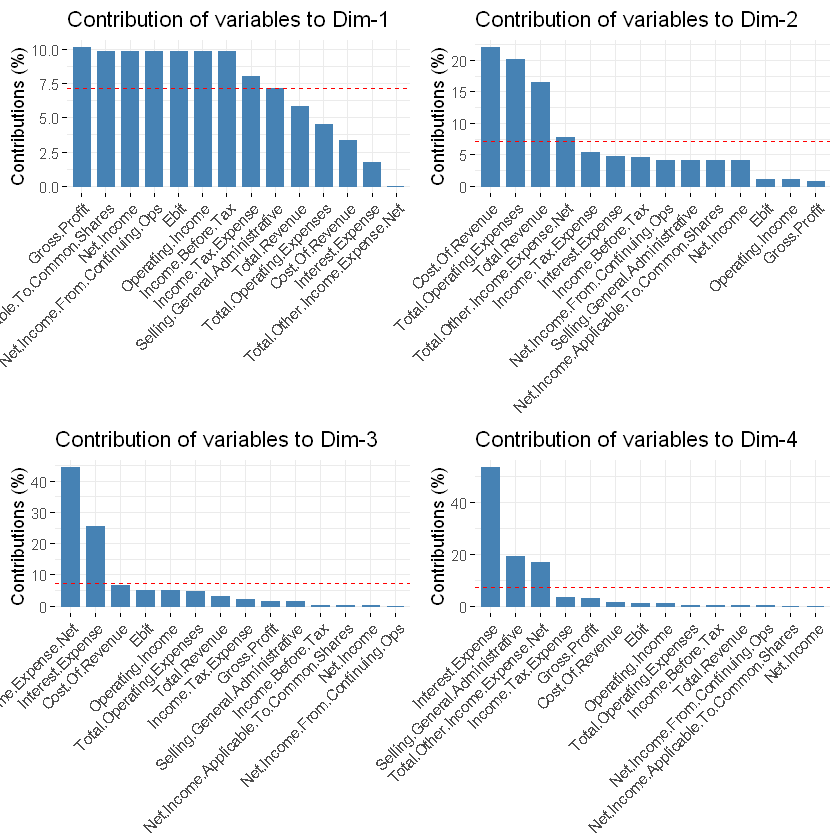

In [41]:
PC1 <- fviz_contrib(pca, choice = "var", axes = 1)
PC2 <- fviz_contrib(pca, choice = "var", axes = 2)
PC3 <- fviz_contrib(pca, choice = "var", axes = 3)
PC4 <- fviz_contrib(pca, choice = "var", axes = 4)
grid.arrange(PC1, PC2, PC3, PC4)

Dimension 1 describes most the profit factors of a company like Gross.Profit, Net.Income.Applicable.To.Common.Shares and Net.Income</br>
Dimension 2 is best described by the cost factors of a company. </br>
Dimension 3 suggests to be described as other expenses.</br>
Dimension 4 is described as interest expenses.


## Clustering

Now that we have dealt with the correlation in the data and reduced the variables into 4 dimensions we can start with grouping the companies. 

Following clustering will be evaluated: 
- K-Means
- PAM
- Hierarchical

We have to not only to decide which clustering method is most appropriate but also the best number of clusters the data should be divided. 
Here, different measures can give a sense of a good fit for clustering. 

We will evaluate the clustering methods by 
- Connectivity
- Dunn
- Silhouette

for cluster sizes between 2 and 24.


In [89]:
# Predict the PC values for the data
df_pca <- data.frame(predict(pca,df_adj_z)[,1:4])

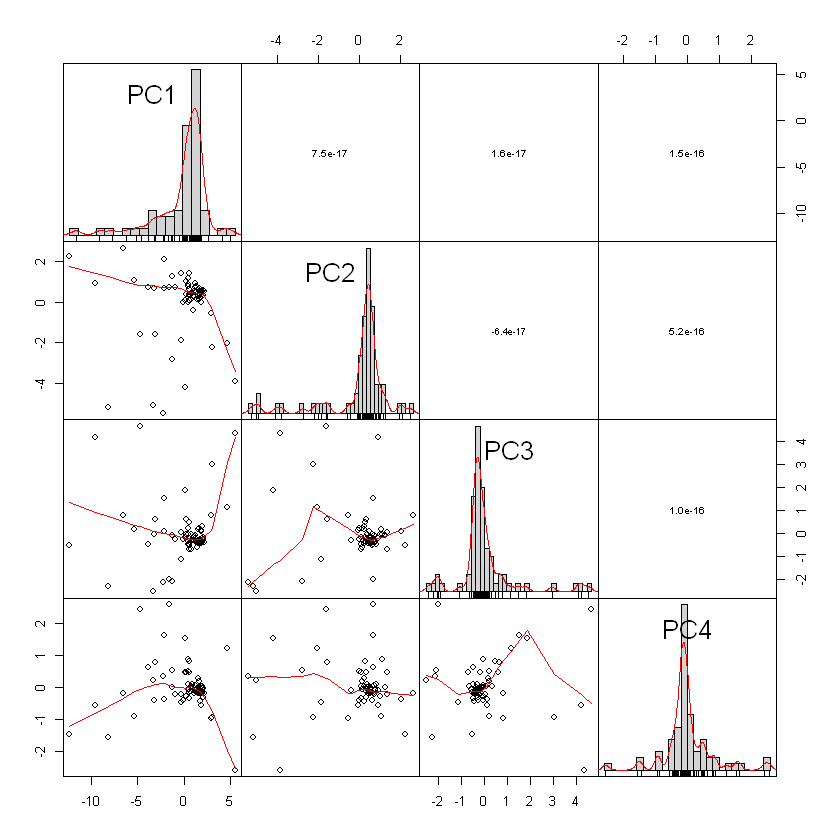

In [43]:
chart.Correlation(df_pca, histogram=TRUE, pch=19)

In [44]:
install.packages("clValid", repo="http://cran.r-project.org",dep=TRUE)
library(clValid)

Warning message:
"dependencies 'Biobase', 'annotate', 'GO.db', 'moe430a.db' are not available"

package 'clValid' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpSSreOT\downloaded_packages


Warning message:
"package 'clValid' was built under R version 3.6.3"
Attaching package: 'clValid'

The following object is masked from 'package:flexclust':

    clusters

The following object is masked from 'package:modeltools':

    clusters



#### Choose Optimal Method and Size

In [49]:
intern <- clValid(df_pca, nClust = 2:24, 
              clMethods = c("hierarchical","kmeans","pam", "clara"), validation = "internal")

In [50]:
summary(intern)


Clustering Methods:
 hierarchical kmeans pam clara agnes 

Cluster sizes:
 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

Validation Measures:
                                 2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18      19      20      21      22      23      24
                                                                                                                                                                                                                  
hierarchical Connectivity   7.6464  8.0964 10.8825 17.1694 23.2643 24.7643 34.1774 35.8940 37.7274 40.9575 41.4575 43.9575 44.9575 46.5766 51.9496 53.8663 56.7952 58.7952 60.7952 62.7119 67.6115 69.6115 75.1063
             Dunn           0.3405  0.3405  0.3236  0.2804  0.2100  0.2100  0.2713  0.2713  0.2713  0.3132  0.3132  0.3132  0.3132  0.3132  0.1978  0.1978  0.3080  0.3080  0.3080  0.3080  0.2962  0.2962  0.2

Hierachical Clustering yields at all the evaluation criterias the best result with 2 clusters. Therefore, we will proceed further with this.

#### Apply Clustering and Visualize Clusters

For the clustering we use the most commonly suggested Ward's method based on a Euclidean dissimilarity matrix [7].

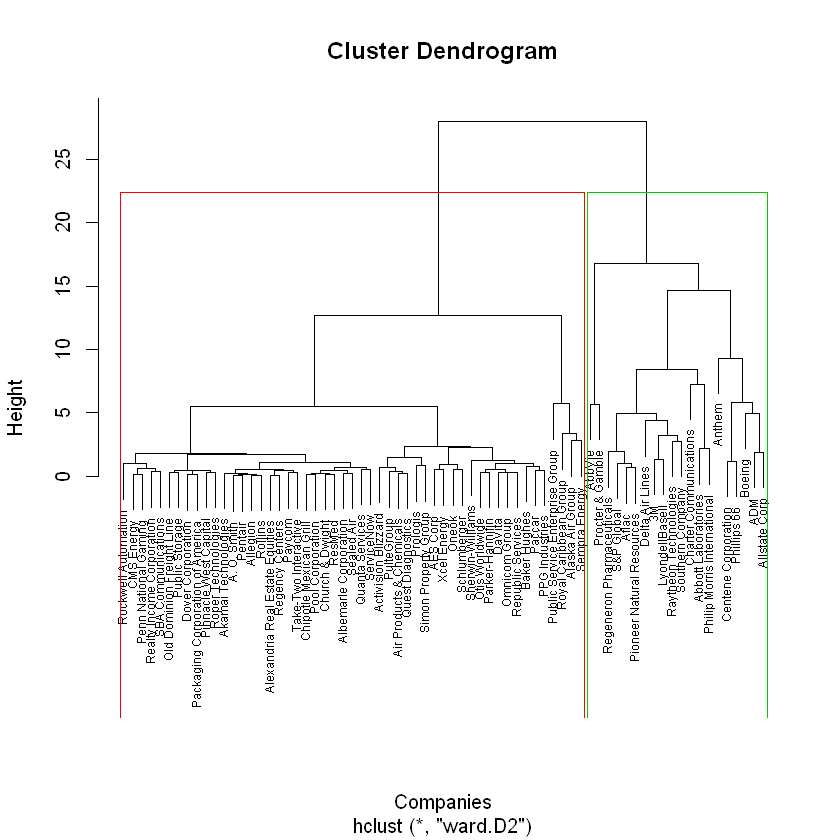

In [88]:
# Compute dissimilarity matrix with euclidean distances
d <- dist(df_pca, method = "euclidean")
# Hierarchical clustering using Ward's method
res.hc <- hclust(d, method = "ward.D2" )
# Cut tree into 2 groups
grp <- cutree(res.hc, k = 2)
# Visualize
plot(res.hc, cex = 0.6, xlab= 'Companies') # plot tree
rect.hclust(res.hc, k = 2, border = 2:5) # add rectangle

We can see from the tree above which company falls into which cluster. We cut the tree into two cluster and get two groups of companies. Now it is from interest to evaluate the clusters of their properties.

## Analyzing the Clusters

To give meaning to the clusters we analyse the clusters by the original variables. With higher number of variables we also could fall back to the principal components we determent earier.

Warning message in data.frame(..., check.names = FALSE):
"row names were found from a short variable and have been discarded"

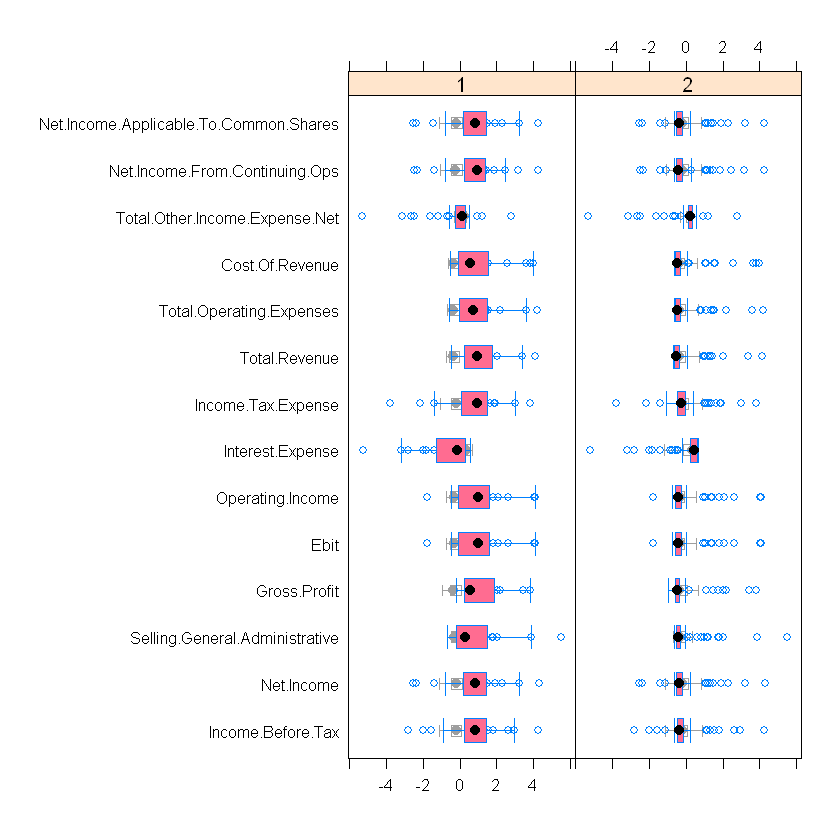

In [91]:
groupBWplot(df_adj_z[,],grp, alpha=0.05)

As see in the chart above, the two formed clusters can describe the companies as healthy and profitable (Cluster 1), and struggeling and deficitary (Cluster 2). </br>
This can especially be seen by the higher profit indicators als EBIT, Net.Income etc.

## Conclusion

With this we can conclude our analysis. We found out, that the financial statements easily can give us an overview of the health of a company. We managed to cluster those companies of the S&P 500 into two categories, healthy and struggeling. 
This can give an investor a good understanding of his investment and guide his further research. </br>
Furthermore, banks can use this knowledge for a first risk check of their corporate creditors if listed in the index.
Also for non index clients, this cluster can be used to predit the preliminary health of other clients.


## Sources
[1] Osadchy, E. A., Akhmetshin, E. M., Amirova, E. F., Bochkareva, T. N., Gazizyanova, Y. Y., & Yumashev, A. V. (2018). Financial statements of a company as an information base for decision-making in a transforming economy. https://www.um.edu.mt/library/oar/handle/123456789/33582 </br>
[2] Chong, D., & Zhu, H. (Harry). (2012). Firm Clustering Based on Financial Statements (SSRN Scholarly Paper ID 2319313). Social Science Research Network. https://papers.ssrn.com/abstract=2319313</br>
[3] Cai, F., Le-Khac, N.-A., & Kechadi, T. (2016). Clustering Approaches for Financial Data Analysis: A Survey. ArXiv:1609.08520 [q-Fin]. http://arxiv.org/abs/1609.08520</br>
[4] Bramer, M. (2016). Principles of Data Mining. Springer London. https://doi.org/10.1007/978-1-4471-7307-6</br>
[5] Fraley, C. (1998). How Many Clusters? Which Clustering Method? Answers Via Model-Based Cluster Analysis. The Computer Journal, 41(8), 578–588. https://doi.org/10.1093/comjnl/41.8.578</br>
[6] RDocumentation. (n.d.). clValid: Validate Cluster Results. https://www.rdocumentation.org/packages/clValid/versions/0.7/topics/clValid </br>
[7] Cady, F. (2017). The data science handbook. John Wiley & Sons, Inc. </br>
[8] Kumar, S. (2020, December 19). How to remove Multicollinearity in dataset using PCA? Medium. https://towardsdatascience.com/how-to-remove-multicollinearity-in-dataset-using-pca-4b4561c28d0b </br>
[9] Lolli, S., & Girolamo, P. D. (2015). Principal Component Analysis Approach to Evaluate Instrument Performances in Developing a Cost-Effective Reliable Instrument Network for Atmospheric Measurements. Journal of Atmospheric and Oceanic Technology, 32(9), 1642–1649. https://doi.org/10.1175/JTECH-D-15-0085.1 </br>
 






## Appendix

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1592  0.1990  0.2309  0.3620  0.4552  1.0000 

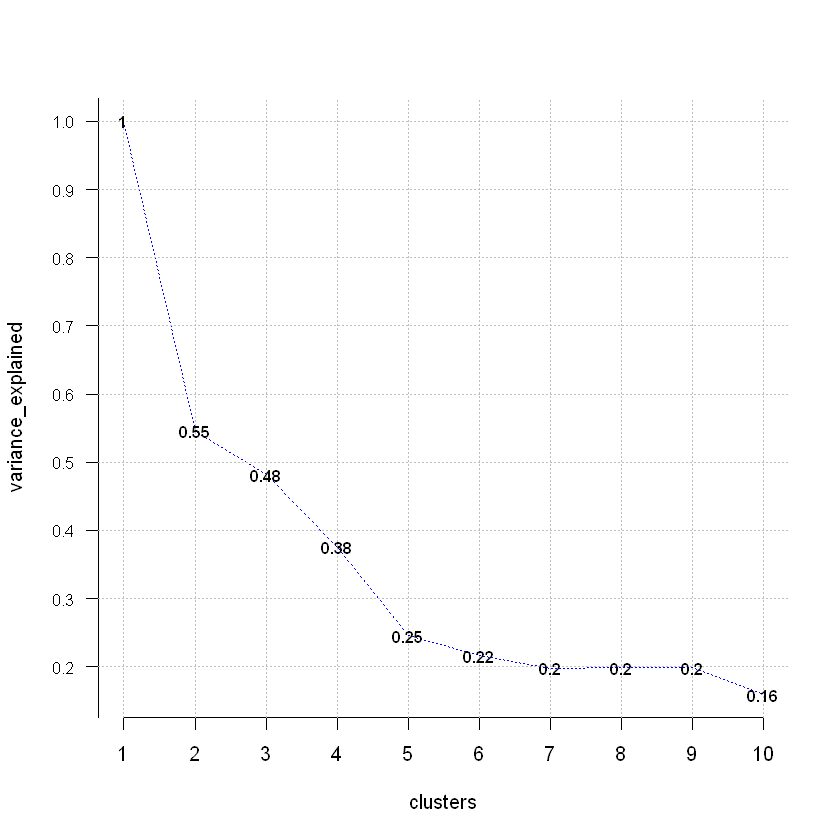

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1797  0.1907  0.2114  0.2601  0.4192 

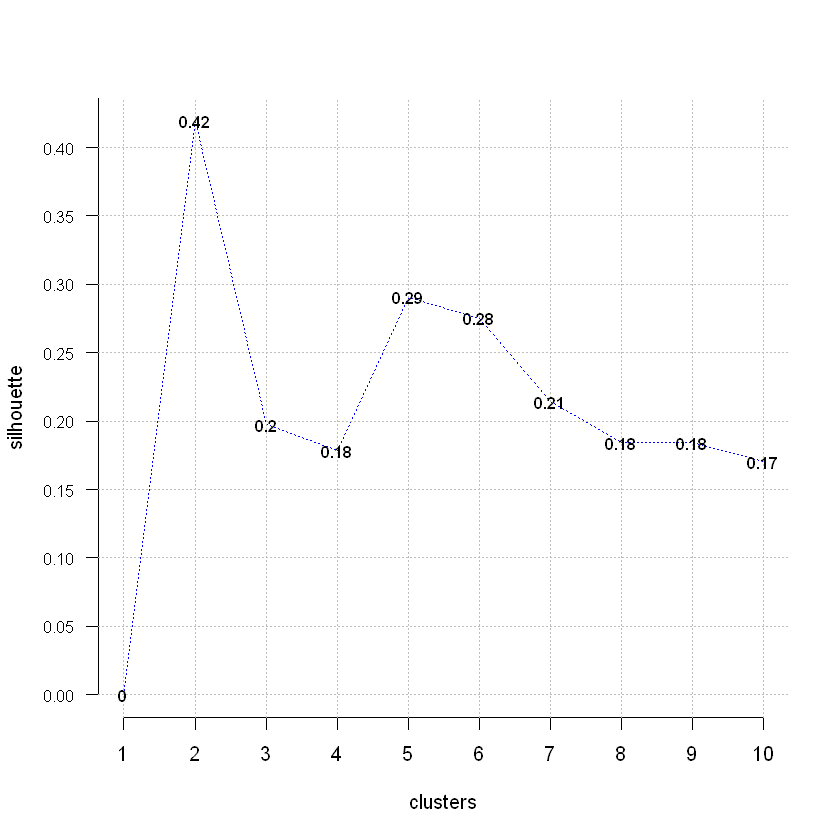

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  231.5   253.4   267.5   388.4   459.2   959.5 

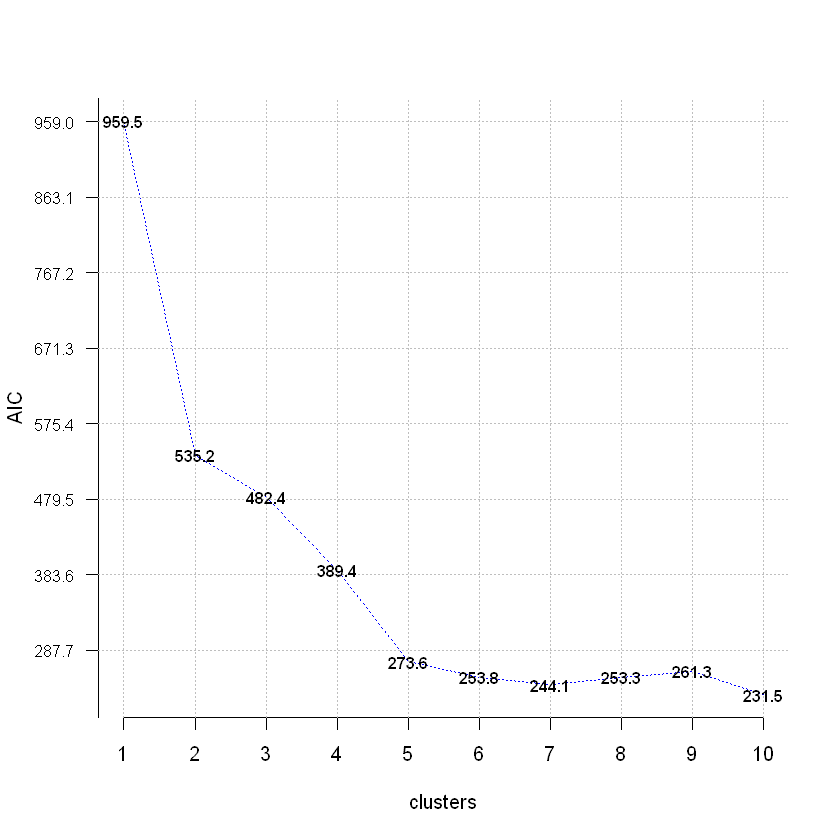

In [53]:
# optimal number of clusters, K-Means
opt2<-Optimal_Clusters_KMeans(df_pca, max_clusters=10, plot_clusters = TRUE)
summary(opt2)
opt2<-Optimal_Clusters_KMeans(df_pca, max_clusters=10, plot_clusters=TRUE, criterion="silhouette")
summary(opt2)
opt2<-Optimal_Clusters_KMeans(df_pca, max_clusters=10, plot_clusters=TRUE, criterion="AIC")
summary(opt2)

# # another approach, decision based on a plot
# opt3<-Optimal_Clusters_Medoids(df_pca, 10, 'euclidean', plot_clusters=TRUE)

# # automatic selection PAM, average silhouette width
opt_aut<-pamk(df_pca, krange=2:10, criterion="asw", usepam=TRUE, scaling=FALSE, alpha=0.001, diss=inherits(df_adj_z, "dist"), critout=FALSE) # fpc::pamk()
class(opt_aut)
opt_aut

[1] "84.5070422535211 %" "15.4929577464789 %"


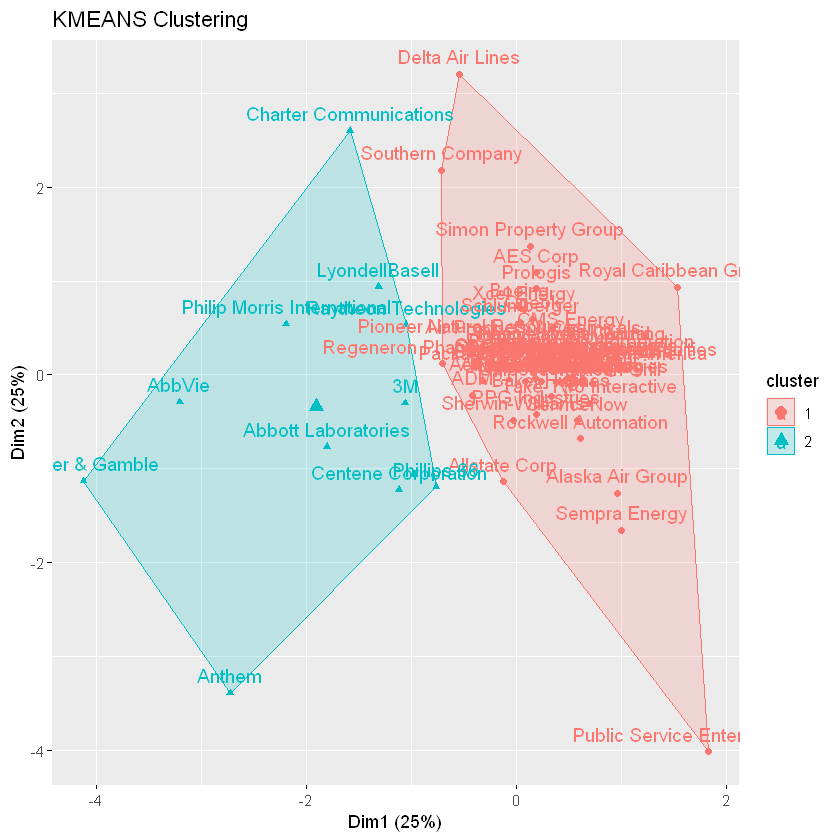

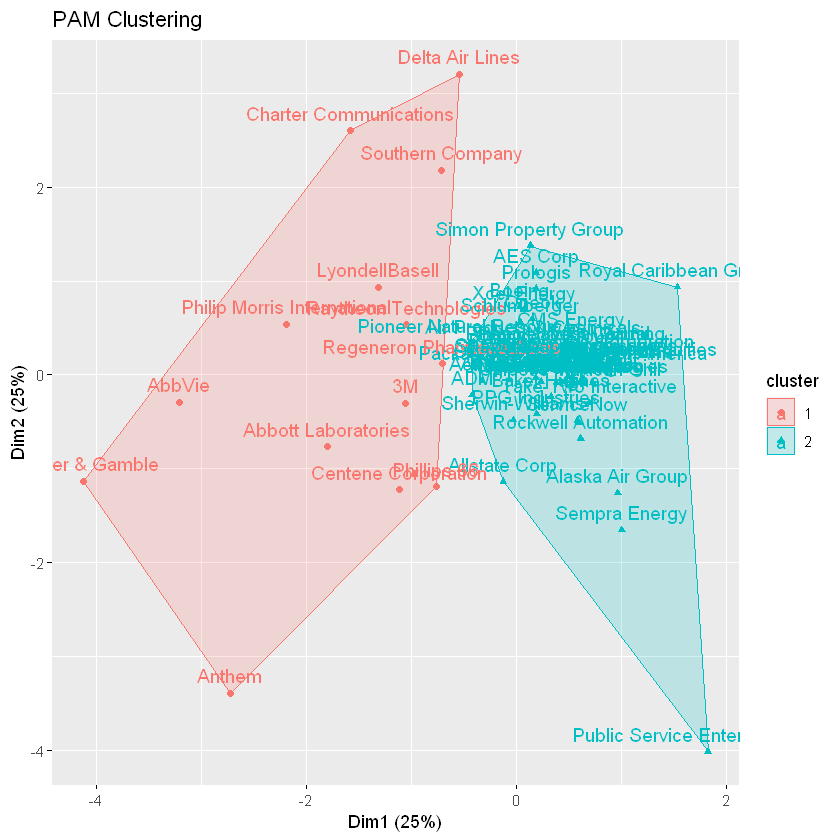

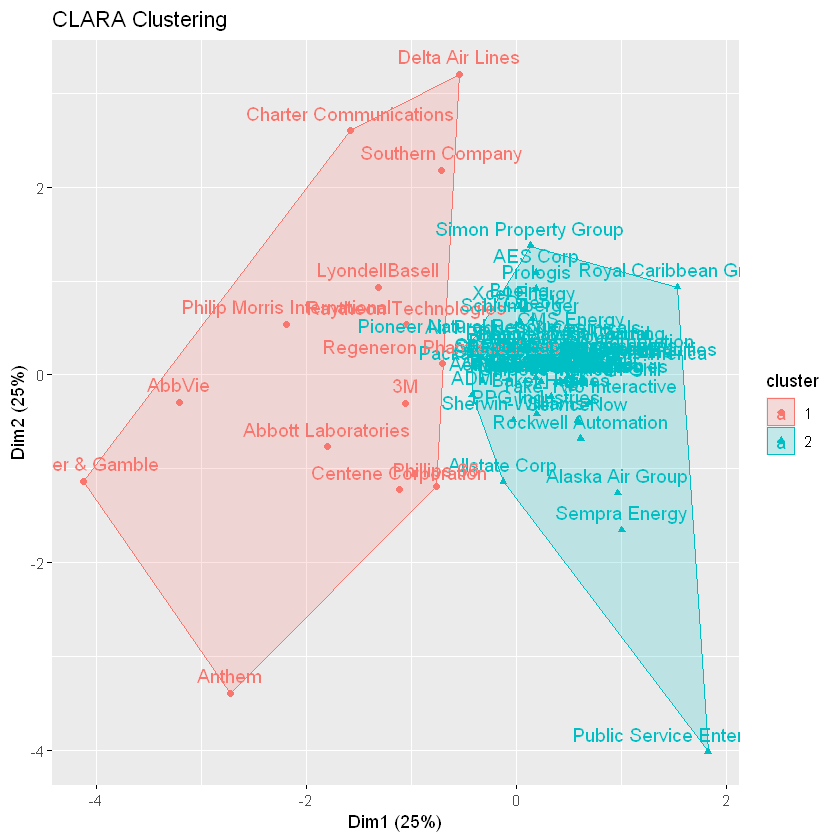

In [54]:
# kmeans
cluster_kmeans<-eclust(df_pca, "kmeans", k= 5) 
print(paste(cluster_kmeans$size/sum(cluster_kmeans$size)*100,"%"))
# pam
cluster_pam<-eclust(df_pca, "pam", k= 2) 
# clara
cluster_clara<-eclust(df_pca, "clara", k=2)


In [75]:
# agglomerative approach
# dissimilarity matrix
d <- dist(df_pca, method = "euclidean")
# complete linkage
cluster_hierarchical <- hclust(d, method = "complete" )

# cut tree into 2 groups
sub_grp_2 <- cutree(cluster_hierarchical, k = 2)

# cut tree into 4 groups
sub_grp_4 <- cutree(cluster_hierarchical, k = 4)

# various measures of clustering quality
c.stat<-cluster.stats(d,sub_grp_2)
c.stat

c.stat2<-cluster.stats(d,sub_grp_4)
c.stat2

0.000000,5.046472
5.046472,0.000000
0.00000,11.76175
11.76175,0.00000


0.000000,2.378675,5.581892,1.514212
2.378675,0.000000,5.046472,8.481921
5.581892,5.046472,0.000000,12.531709
1.514212,8.481921,12.531709,0.000000
0.000000,7.430732,11.757003,5.717078
7.430732,0.000000,7.445687,10.750527
11.757003,7.445687,0.000000,15.071143
5.717078,10.750527,15.071143,0.000000
